# Init

In [1]:
import os, sys, time

import numpy as np
import matplotlib.pyplot as plt

config = "bruz"
if config == "ur1":
    sys.path.insert(0, "../")
    siepelDir = "C:/Users/pleroy/Documents/CAMILL/SER/WR15_v2"
elif config == "bruz":
    sys.path.insert(0, "/home/pleroy/DEV/DIADEM")
    siepelDir = "/home/pleroy/DATA/CAMILL/WR15_v2"

import toolsdiadem.tools as dia
import toolsdiadem.ser as ser
from toolsdiadem.Probe import Probe
from toolsdiadem.ConfigSer import ConfigSer

In [2]:
#%matplotlib qt5
%load_ext autoreload
%autoreload 2

In [3]:
cmap='jet'
configSupport = os.path.join(siepelDir, "wr15_plaqueSupport.ini")
conf = ConfigSer(configSupport)
conf.printConfig()

/home/pleroy/DATA/CAMILL/WR15_v2/wr15_plaqueSupport.ini
nb_elev 41
nb_freq 2001
nb_ssb 3
el0 0.7
az0 -0.44
base_path /home/pleroy/DATA/CAMILL/WR15_v2
out_path /home/pleroy/DATA/CAMILL/WR15_v2/processing/wr15
gateWidth 500.0
gateCenter 6450.0


# Données de la probe

In [4]:
probe = Probe(os.path.join(conf.base_path, "S11FDC_WR15.s1p"))

# Calcul du fond de chambre
ref: ser4siepel_multiband_scan_elev_F2C.sce

In [5]:
S11_f2c = ser.computeF2C(conf.base_path, conf.dic_dir, conf.nb_elev, conf.nb_freq, conf.nb_ssb)

nbAbs = 19
20200701
000_A
001_C
002_E
003_W
004_V
005_G
20200703
006_L
007_M
008_X
009_H
010_I
011_K
012_J
013_O
014_N
015_D
016_T
017_AB_u
018_N_u


Text(0.5, 1.0, 'time domain')

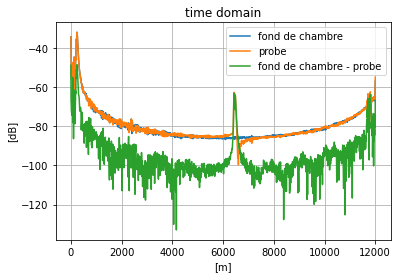

In [6]:
fig, ax = plt.subplots(1,1)
ax.plot(probe.d, ser.dB(np.fft.ifft(S11_f2c)), label="fond de chambre")
ax.plot(probe.d, ser.dB(np.fft.ifft(probe.S11)), label="probe")
ax.plot(probe.d, ser.dB(np.fft.ifft(S11_f2c - probe.S11)), label="fond de chambre - probe")
ax.grid()
ax.legend()
ax.set_xlabel("[m]")
ax.set_ylabel("[dB]")
ax.set_title("time domain")

# Sauvegarde des données

In [8]:
probe.data[:,1] = np.real(S11_f2c)
probe.data[:,2] = np.imag(S11_f2c)
file_f2c = f"{conf.out_path}/data/WR15_S11_fond_de_chambre.txt"
np.savetxt(file_f2c , probe.data, header="#GHz real imag")
print(file_f2c)

/home/pleroy/DATA/CAMILL/WR15_v2/processing/wr15/data/WR15_S11_fond_de_chambre.txt
